In [1]:
%matplotlib ipympl

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from onix.analysis.fitter import Fitter

In [10]:
def exp_decay(t, a, τ, c):
    return a * np.exp(-t / τ) + c

In [25]:
times = [
    datetime(2023, 11, 23, 17, 52),
    datetime(2023, 11, 24, 15, 53),
    datetime(2023, 11, 25, 21, 57),
    datetime(2023, 11, 27, 15, 33),
    datetime(2023, 11, 28, 9, 13),
    datetime(2023, 11, 28, 13, 57),
    datetime(2023, 11, 28, 18, 27),
    datetime(2023, 11, 29, 12, 31),
    datetime(2023, 11, 30, 14, 18),
]
freqs = [
    516847.042 - 1.5,
    516845.863,
    516846.130,
    516847.975 - 1.5,
    516846.612,
    516846.642,
    516846.678,
    516846.808,
    516846.986,
]
times = [time.timestamp() for time in times]
times = [time - times[0] for time in times]
times = np.array(times) / 3600 / 24

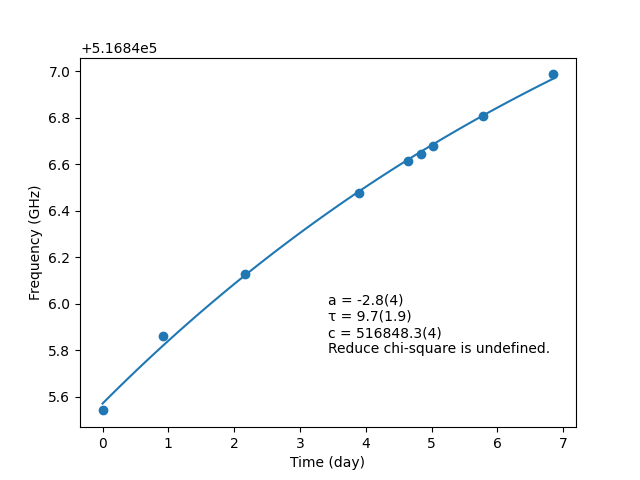

In [27]:
fig, ax = plt.subplots()
ax.scatter(times, freqs)

fitter = Fitter(exp_decay)
fitter.set_data(times, freqs)
fitter.set_absolute_sigma(False)
fitter.set_p0({"c": 516847, "τ": 5})
fitter.fit()
times_plt = np.linspace(min(times), max(times), 100)
ax.plot(times_plt, fitter.fitted_value(times_plt))
ax.set_ylabel("Frequency (GHz)")
ax.set_xlabel("Time (day)")
ax.text(0.5, 0.2, fitter.all_results_str(), transform=ax.transAxes)

plt.show()